## Unsupervised Technique for Change Detection (MAD + KMeans)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.morphology as morph
import pathlib
import numpy as np
import rasterio

from sklearn.metrics import jaccard_score, f1_score, precision_score, recall_score, cohen_kappa_score
from sklearn.cross_decomposition import CCA
from sklearn.cluster import KMeans

In [2]:
def run_mad(im1: np.ndarray, im2: np.ndarray, n_components: int=1) -> np.ndarray:
    """
    Based on the GEE tutorial: https://developers.google.com/earth-engine/tutorials/community/imad-tutorial-pt1
    Run the MAD (Multivariate Alteration Detection) algorithm band by band to detect changes 
    between two multiband images using rasterio.

    Args:
    im1 (np.ndarray): Path to the first multiband image.
    im2 (np.ndarray): Path to the second multiband image.
    n_components (int): Number of canonical components to compute.

    Returns:
    np.ndarray: Array of MAD components with shape (bands, rows, cols).
    """

    # Get spatial dimensions
    bands, rows, cols = im1.shape

    # Initialize output array
    mad_components = np.zeros((bands, rows, cols))

    # Iterate over bands
    for band in range(bands):
        print(f"Processing band {band + 1}/{bands}...")

        # Step 2: Extract a single band and reshape to (pixels, 1)
        im1_band = im1[band].reshape(-1, 1)  # Shape: (pixels, 1)
        im2_band = im2[band].reshape(-1, 1)  # Shape: (pixels, 1)

        # Step 3: Perform Canonical Correlation Analysis (CCA) for the band
        cca = CCA(n_components=n_components)
        cca.fit(im1_band, im2_band)

        # Project images into the canonical space
        U = cca.transform(im1_band)  # Projections of im1_band
        V = cca.transform(im2_band)  # Projections of im2_band

        # Step 4: Compute the MAD components (differences in canonical space)
        M = U - V  # Shape: (pixels, n_components)

        # Step 5: Reshape back to image dimensions
        mad_components[band] = M.T.reshape(rows, cols)  # Shape: (rows, cols)

    return mad_components

In [3]:
def classify_mad(mad: np.ndarray, n_clusters: int=2, n_samples: int=512*512) -> np.ndarray:
    """
    Classify the standardized iMAD variates using k-means clustering.

    Args:
    - mad (numpy.ndarray): MAD components with shape (bands, rows, cols).
    - n_clusters (int): number of clusters for k-means.
    - n_samples (int): number of samples for clustering. Default all samples.

    Returns:
    - numpy.ndarray, Classified image in the shape of (rows, cols).
    """
    # Flatten the data
    C, H, W = mad.shape    
    data = mad.reshape(C, -1).T  # Shape [H*W, C]

    # Randomly sample the data
    if data.shape[0] > n_samples:
        indices = np.random.choice(data.shape[0], n_samples, replace=False)
        data = data[indices]

    # Train k-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(data)

    # Classify the entire image
    flat_result = kmeans.predict(mad.reshape(C, -1).T)

    result = flat_result.reshape(H, W)

    return result

In [4]:
## Test the MAD algorithm with the files in testData
t1_files = sorted(list(pathlib.Path("./testData/t1").rglob("*.tif")))
t2_files = sorted(list(pathlib.Path("./testData/t2").rglob("*.tif")))
gt_files = sorted(list(pathlib.Path("./testData/gt").rglob("*.tif")))

Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.09359999999999999..2.0423999999999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1059..2.0952].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0546..1.722].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.06580000000000001..1.4532].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1341..2.8968].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1767..2.4708].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1662..1.944].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1464..1.9104].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1023..1.7826].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.10799999999999998..1.6848].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.2026..1.7639999999999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.18580000000000002..1.5882].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.186..1.6368].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1992..1.6092].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.19080000000000003..1.9140000000000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1704..2.5632].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.13122857142857144..2.6351999999999998].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.1206..2.2608].


Processing band 1/6...
Processing band 2/6...
Processing band 3/6...
Processing band 4/6...
Processing band 5/6...
Processing band 6/6...


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.11699999999999999..2.472].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.12179999999999999..2.4143999999999997].


{'ROI': '0016', 'IoU': 0.05180579005888893, 'F1': 0.09850828080341412, 'Precision': 0.051931968295904886, 'Recall': 0.9552012148823082, 'Kappa': 0.0898345859788392}
{'ROI': '0049', 'IoU': 0.37510904332654843, 'F1': 0.5455698879255657, 'Precision': 0.42786069651741293, 'Recall': 0.7526254375729288, 'Kappa': 0.5339123250300952}
{'ROI': '0073', 'IoU': 0.09698873083317938, 'F1': 0.17682721455035366, 'Precision': 0.09725223834516826, 'Recall': 0.9728227300802965, 'Kappa': 0.14812922994689415}
{'ROI': '0101', 'IoU': 0.0, 'F1': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'Kappa': -0.12844599600776774}
{'ROI': '0107', 'IoU': 0.01320190694211386, 'F1': 0.026059775157663834, 'Precision': 0.0132220367278798, 'Recall': 0.8966037735849056, 'Kappa': 0.016259715539996056}
{'ROI': '0116', 'IoU': 0.0, 'F1': 0.0, 'Precision': 0.0, 'Recall': 0.0, 'Kappa': -0.01003244590360075}
{'ROI': '0116_1', 'IoU': 0.6976729194868819, 'F1': 0.8219167679222357, 'Precision': 0.8951286080555785, 'Recall': 0.7597753597753598, '

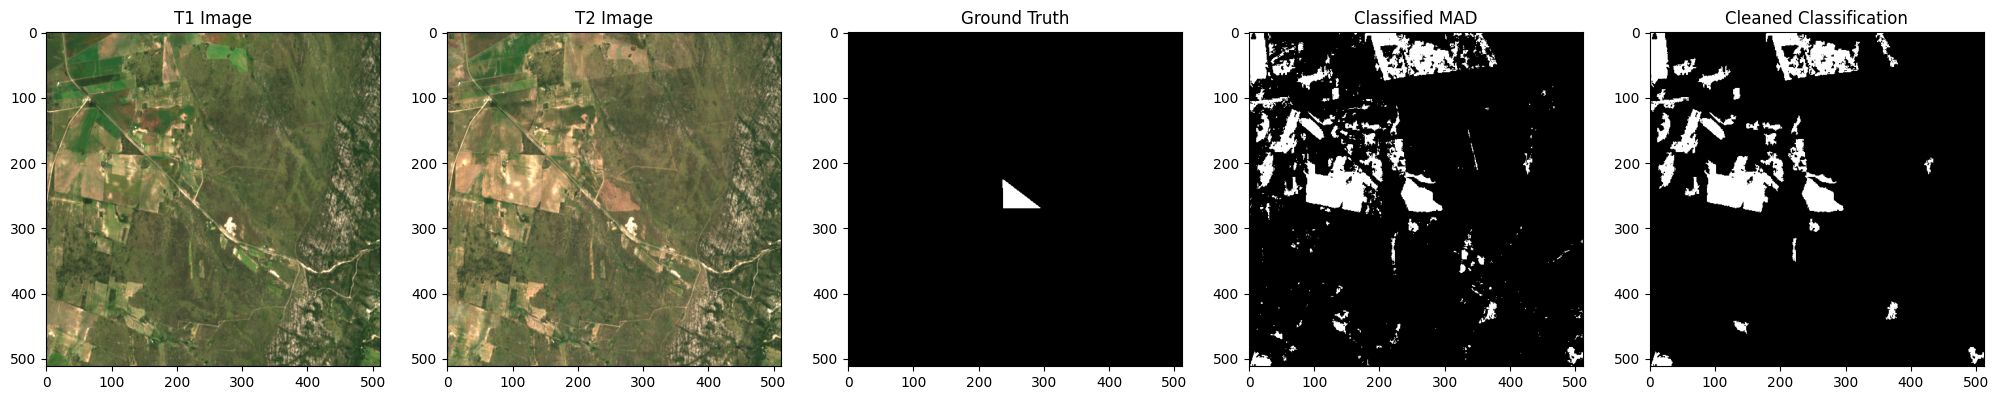

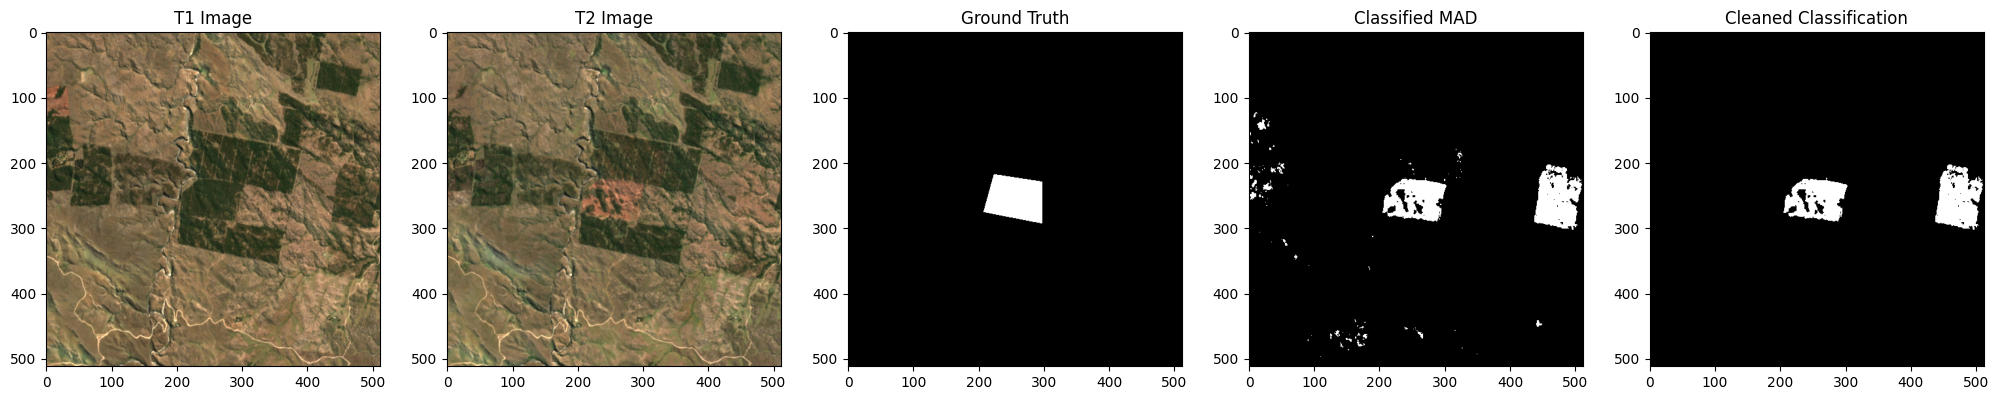

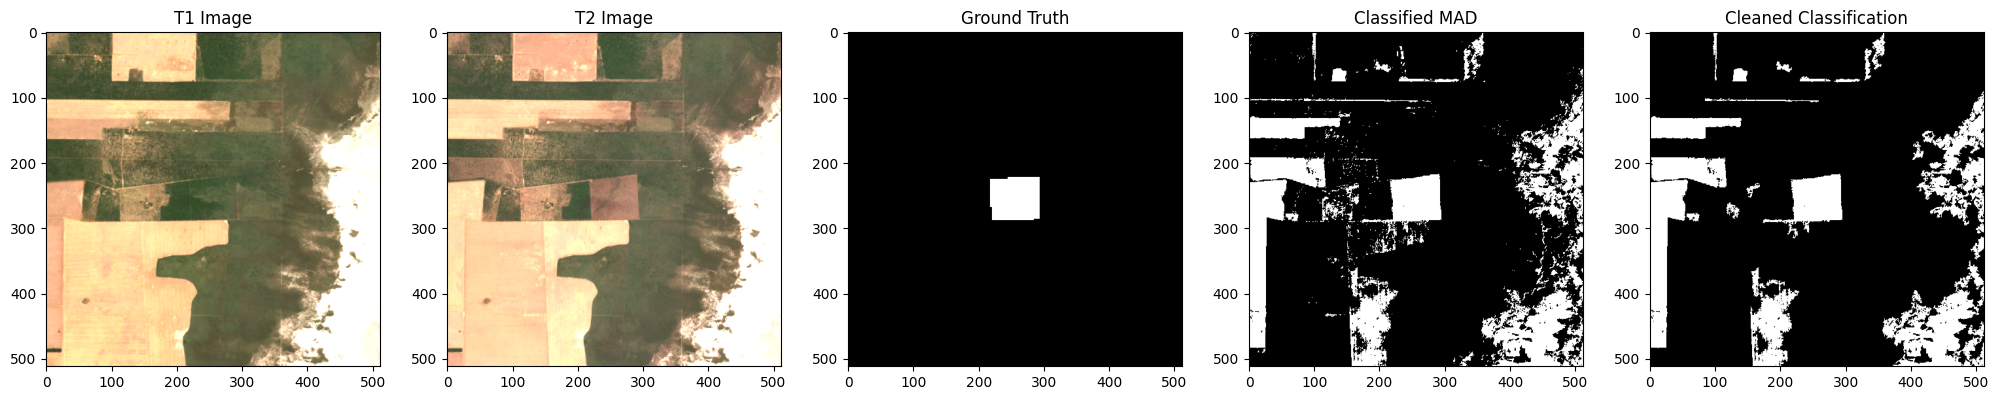

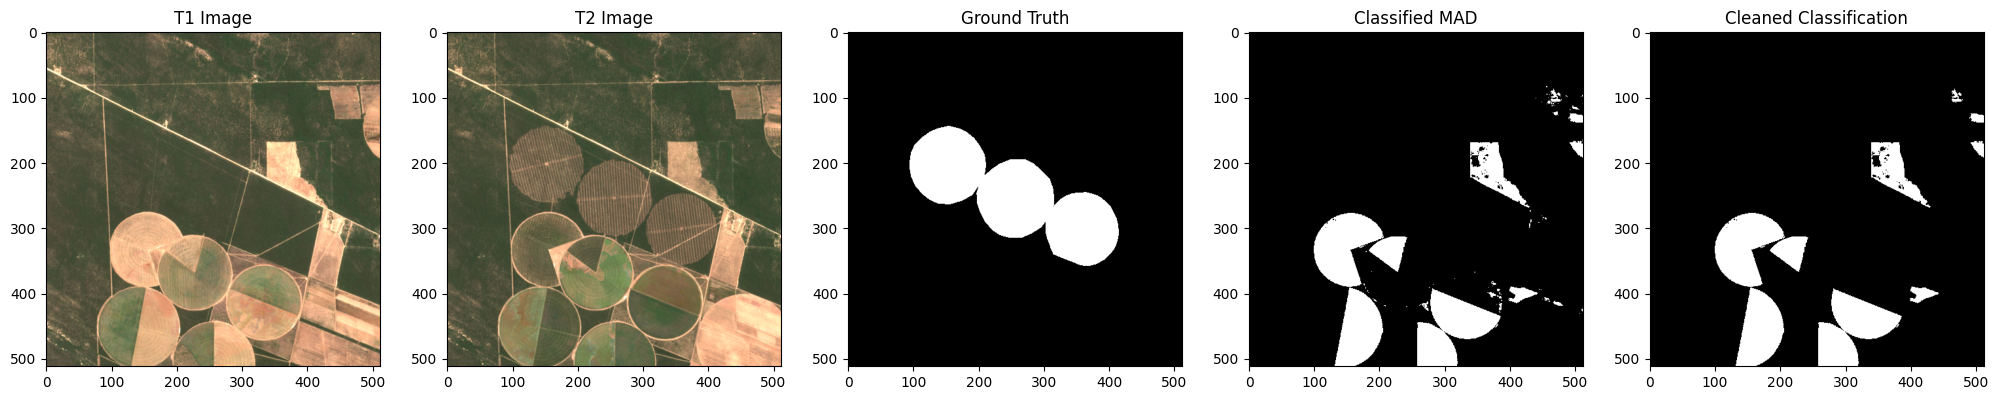

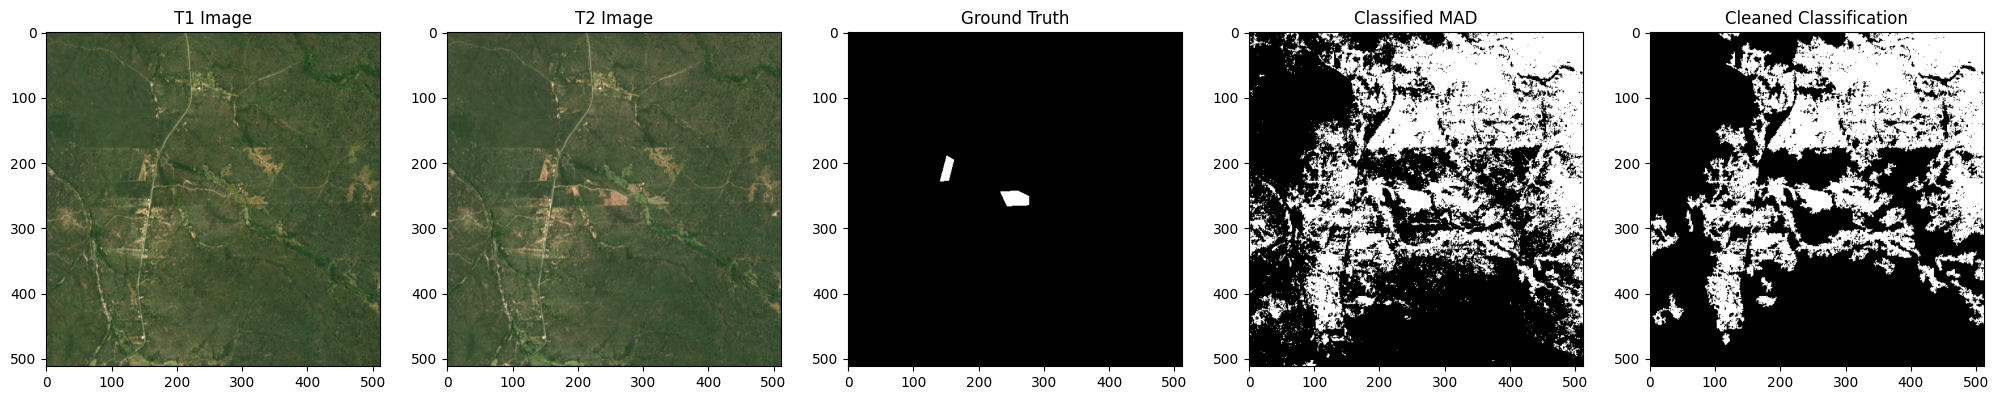

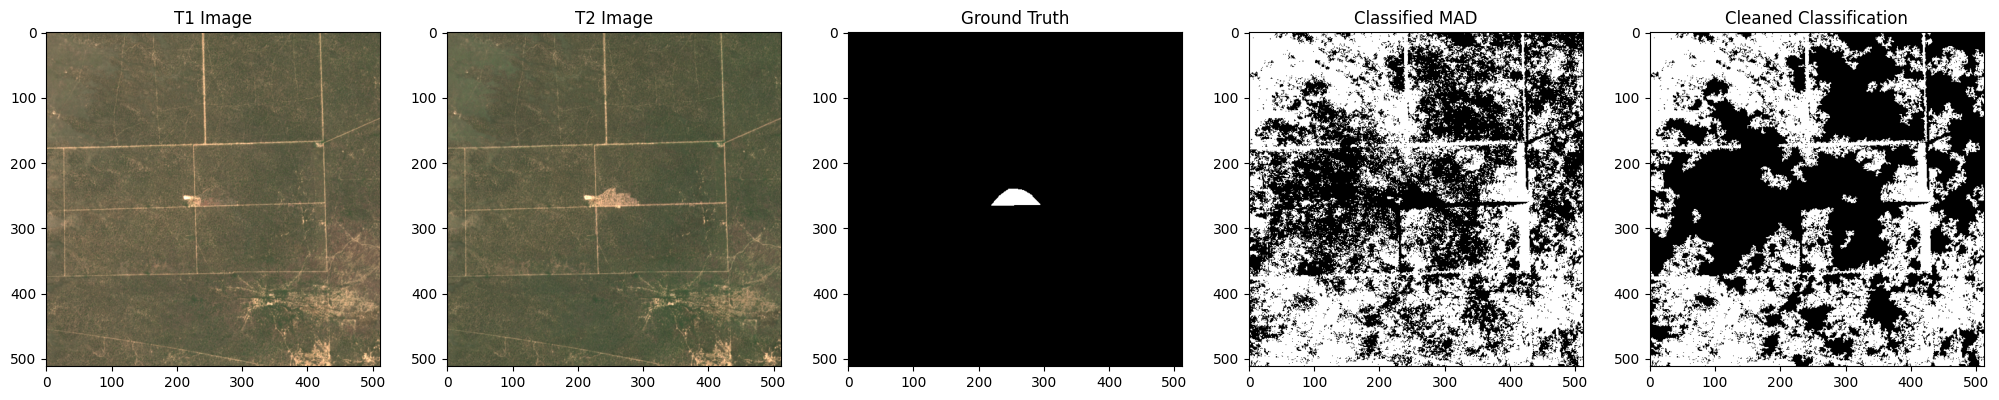

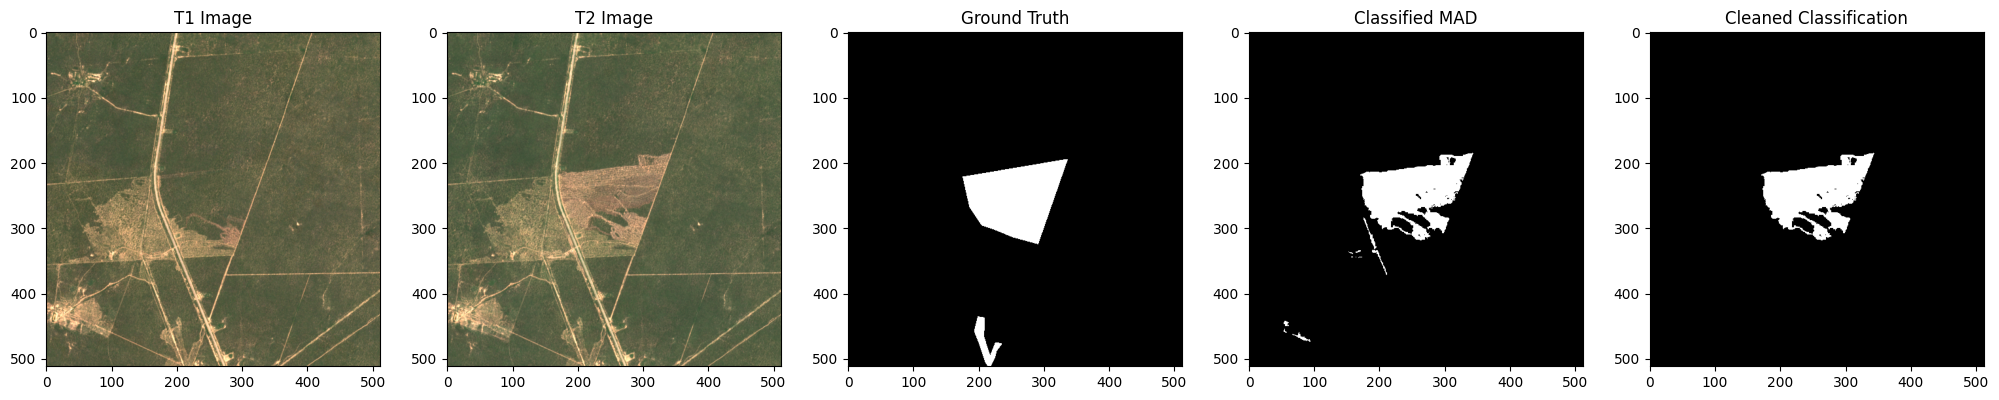

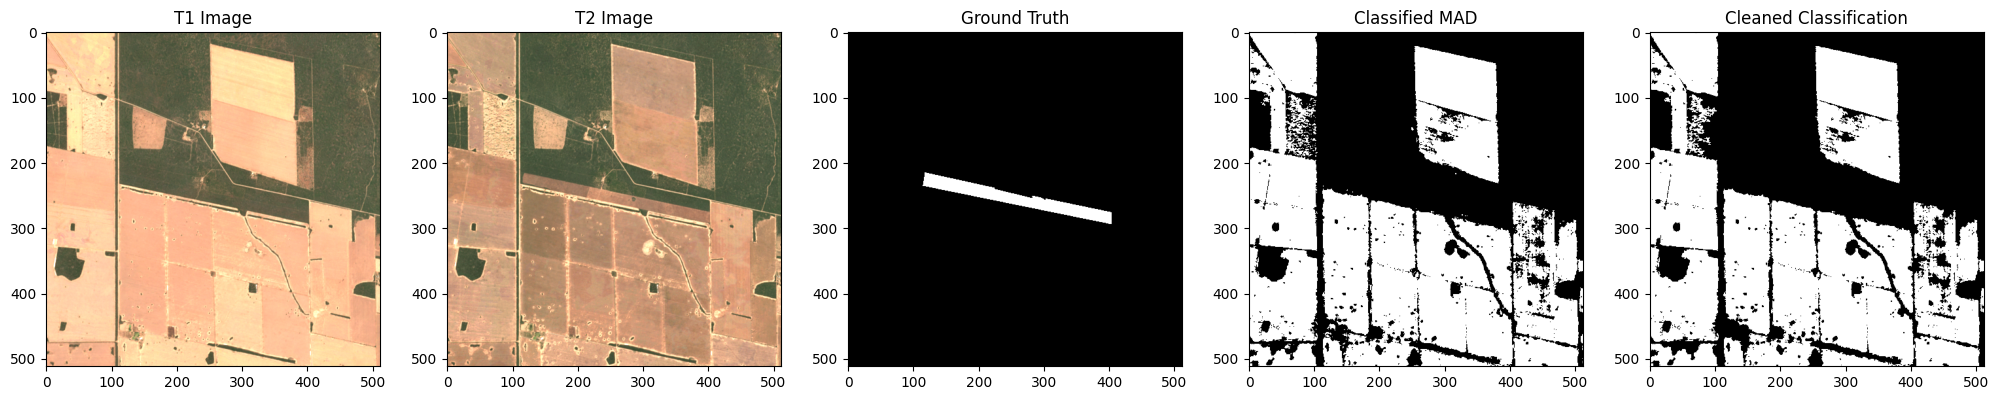

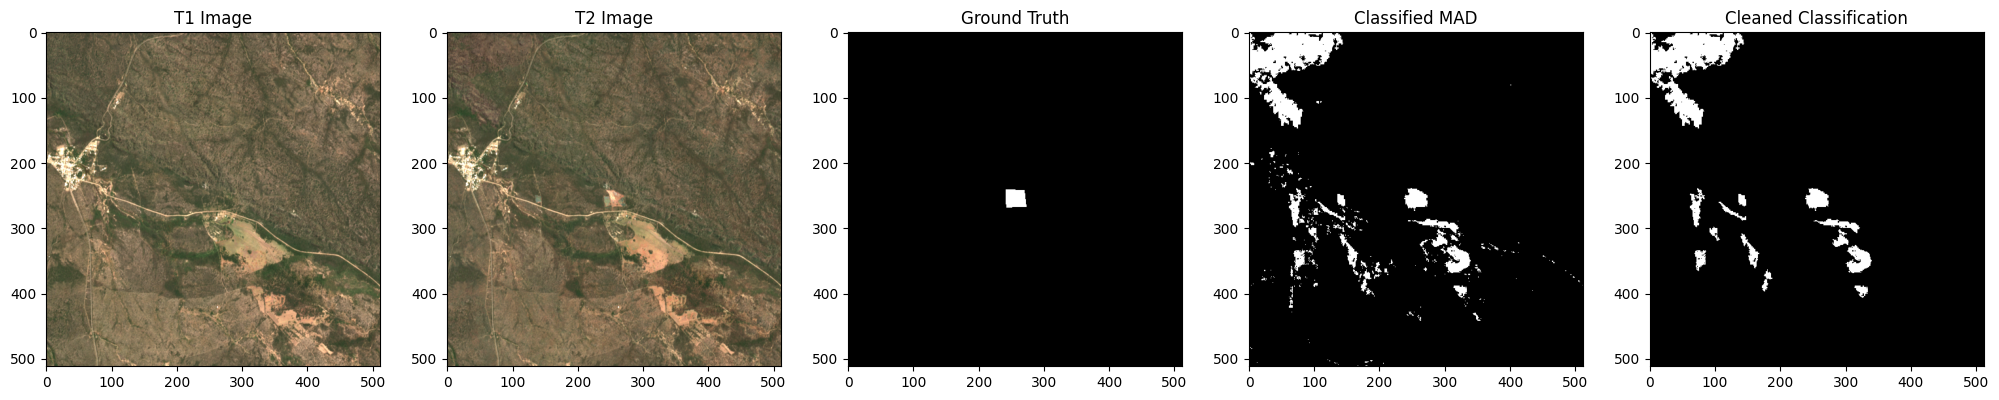

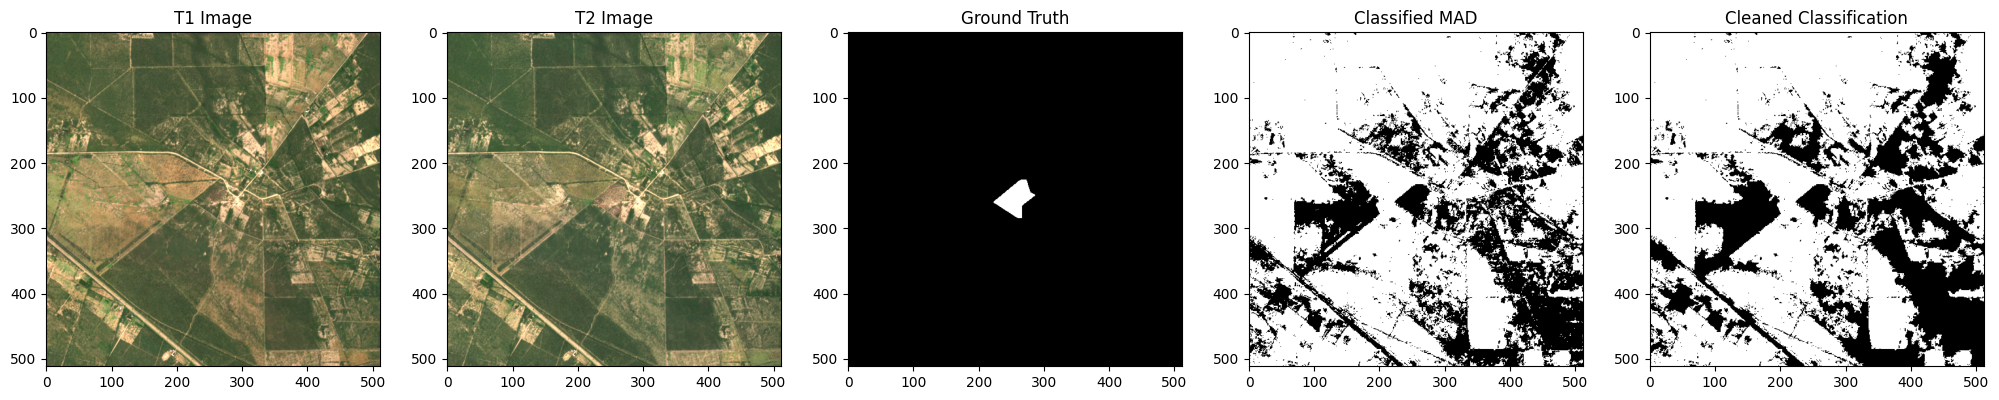

In [7]:
# Define the output folder
OUT_FOLDER = pathlib.Path("./testData/mad_comparision")
OUT_FOLDER.mkdir(parents=True, exist_ok=True)

# Set up the list to store the metrics
metrics_list = []

# Iterate over the files
for i, (t1_file, t2_file, gt_file) in enumerate(zip(t1_files, t2_files, gt_files)):
    with rasterio.open(t1_file) as t1_src, rasterio.open(t2_file) as t2_src, rasterio.open(gt_file) as gt_src:
        # Leer las imágenes
        t1_image = t1_src.read([3, 2, 1, 7, 9, 10]) / 10000
        t2_image = t2_src.read([3, 2, 1, 7, 9, 10]) / 10000
        gt_image = gt_src.read(1)

        # Obtener los componentes MAD
        mad_t1 = run_mad(t1_image, t2_image)
        
        # Clasificación
        classified_mad = classify_mad(mad_t1, n_clusters=2)
        clean_class = morph.remove_small_objects(classified_mad.astype(bool), min_size=128, connectivity=1)
        clean_class = clean_class.astype(np.uint8)

        # Calcular las métricas
        iou = jaccard_score(gt_image.flatten(), clean_class.flatten())
        f1 = f1_score(gt_image.flatten(), clean_class.flatten())
        precision = precision_score(gt_image.flatten(), clean_class.flatten())
        recall = recall_score(gt_image.flatten(), clean_class.flatten())
        kappa = cohen_kappa_score(gt_image.flatten(), clean_class.flatten())

        # Guardar las métricas en la lista
        metrics_list.append({
            "ROI": t1_file.stem,
            "IoU": iou,
            "F1": f1,
            "Precision": precision,
            "Recall": recall,
            "Kappa": kappa
        })

        # Plot the results
        fig, ax = plt.subplots(1, 5, figsize=(25, 5))
        ax[0].imshow(t1_image[[0, 1, 2]].transpose(1, 2, 0) * 6)
        ax[0].set_title("T1 Image")

        ax[1].imshow(t2_image[[0, 1, 2]].transpose(1, 2, 0) * 6)
        ax[1].set_title("T2 Image")
        
        ax[2].imshow(gt_image, cmap='gray')
        ax[2].set_title("Ground Truth")
        
        ax[3].imshow(classified_mad, cmap='gray')
        ax[3].set_title("Classified MAD")
        
        ax[4].imshow(clean_class, cmap='gray')
        ax[4].set_title("Cleaned Classification")
        plt.savefig(OUT_FOLDER / f"{t1_file.stem}.png")

# Show the metrics
for metrics in metrics_list:
    print(metrics)